In [67]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import koreanize_matplotlib
from wordcloud import WordCloud, STOPWORDS
import kagglehub
import os
import zipfile
import shutil
import plotly.express as px



###  /home/yj/dev_ws/project_UFO/data -> ÏûêÏã†Ïùò ÌôòÍ≤ΩÏóê ÎßûÍ≤å ÏàòÏ†ï

In [68]:
# Ï†ÄÏû•Ìï† Í≤ΩÎ°ú
save_path = '/home/yj/dev_ws/project_UFO/data'    #  /home/yj/dev_ws/project_UFO/data -> ÏûêÏã†Ïùò ÌôòÍ≤ΩÏóê ÎßûÍ≤å ÏàòÏ†ï
os.makedirs(save_path, exist_ok=True)

# dataset Îã§Ïö¥Î°úÎìú (ÏµúÏã† Î≤ÑÏ†Ñ)
downloaded = kagglehub.dataset_download("NUFORC/ufo-sightings", force_download=True)

# Îã§Ïö¥Î°úÎìú Í≤∞Í≥º ÌôïÏù∏
if os.path.isdir(downloaded):
    # Ïù¥ÎØ∏ Ìè¥ÎçîÎùºÎ©¥, ÏïàÏóê ÏûàÎäî ÌååÏùºÏùÑ save_pathÎ°ú Î≥µÏÇ¨
    for file in os.listdir(downloaded):
        shutil.copy(os.path.join(downloaded, file), save_path)
    print(f"Dataset folder copied to: {save_path}")
else:
    # zip ÌååÏùºÏù¥Î©¥ Ïù¥Îèô ÌõÑ ÏïïÏ∂ï Ìï¥Ï†ú
    shutil.move(downloaded, os.path.join(save_path, 'ufo-sightings.zip'))
    with zipfile.ZipFile(os.path.join(save_path, 'ufo-sightings.zip'), 'r') as zip_ref:
        zip_ref.extractall(save_path)
    print(f"Dataset downloaded and extracted to: {save_path}")


100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 10.2M/10.2M [00:01<00:00, 8.96MB/s]

Extracting files...


Dataset folder copied to: /home/yj/dev_ws/project_UFO/data


In [69]:
raw_data = pd.read_csv('/home/yj/dev_ws/project_UFO/data/scrubbed.csv')
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80332 entries, 0 to 80331
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   datetime              80332 non-null  object 
 1   city                  80332 non-null  object 
 2   state                 74535 non-null  object 
 3   country               70662 non-null  object 
 4   shape                 78400 non-null  object 
 5   duration (seconds)    80332 non-null  object 
 6   duration (hours/min)  80332 non-null  object 
 7   comments              80317 non-null  object 
 8   date posted           80332 non-null  object 
 9   latitude              80332 non-null  object 
 10  longitude             80332 non-null  float64
dtypes: float64(1), object(10)
memory usage: 6.7+ MB


/tmp/ipykernel_4850/3585133660.py:1: DtypeWarning:

Columns (5,9) have mixed types. Specify dtype option on import or set low_memory=False.



In [70]:
UFO = pd.read_csv('/home/yj/dev_ws/project_UFO/data/scrubbed.csv', header=0, low_memory=False)
UFO.head(30)

datetime                           city state country      shape  \
0   10/10/1949 20:30                     san marcos    tx      us   cylinder   
1   10/10/1949 21:00                   lackland afb    tx     NaN      light   
2   10/10/1955 17:00           chester (uk/england)   NaN      gb     circle   
3   10/10/1956 21:00                           edna    tx      us     circle   
4   10/10/1960 20:00                        kaneohe    hi      us      light   
5   10/10/1961 19:00                        bristol    tn      us     sphere   
6   10/10/1965 21:00             penarth (uk/wales)   NaN      gb     circle   
7   10/10/1965 23:45                        norwalk    ct      us       disk   
8   10/10/1966 20:00                      pell city    al      us       disk   
9   10/10/1966 21:00                       live oak    fl      us       disk   
10  10/10/1968 13:00                      hawthorne    ca      us     circle   
11  10/10/1968 19:00                        brevard    nc      us   fireball   
12  10/10/1970 16:00                       bellmore    ny      us       disk   
13  10/10/1970 19:00                     manchester    ky      us    unknown   
14  10/10/1971 21:00                      lexington    nc      us       oval   
15  10/10/1972 19:00                  harlan county    ky      us     circle   
16  10/10/1972 22:30                west bloomfield    mi      us       disk   
17  10/10/1973 19:00                        niantic    ct      us       disk   
18  10/10/1973 23:00                    bermuda nas   NaN     NaN      light   
19  10/10/1974 19:30                         hudson    ma      us      other   
20  10/10/1974 21:30             cardiff (uk/wales)   NaN      gb       disk   
21  10/10/1974 23:00                         hudson    ks      us      light   
22  10/10/1975 17:00               north charleston    sc      us      light   
23  10/10/1976 20:30                      washougal    wa      us       oval   
24  10/10/1976 22:00  stoke mandeville (uk/england)   NaN      gb      cigar   
25  10/10/1977 12:00                    san antonio    tx      us      other   
26  10/10/1977 22:00                     louisville    ky      us      light   
27  10/10/1978 02:00                         elmont    ny      us  rectangle   
28  10/10/1979 00:00                   poughkeepsie    ny      us    chevron   
29  10/10/1979 22:00           saddle lake (canada)    ab     NaN   triangle   

   duration (seconds) duration (hours/min)  \
0                2700           45 minutes   
1                7200              1-2 hrs   
2                  20           20 seconds   
3                  20             1/2 hour   
4                 900           15 minutes   
5                 300            5 minutes   
6                 180         about 3 mins   
7                1200           20 minutes   
8                 180           3  minutes   
9                 120      several minutes   
10                300               5 min.   
11                180            3 minutes   
12               1800              30 min.   
13                180            3 minutes   
14                 30           30 seconds   
15               1200            20minutes   
16                120            2 minutes   
17               1800            20-30 min   
18                 20              20 sec.   
19               2700           45 minutes   
20               1200           20 minutes   
21               1200            one hour?   
22                360          5-6 minutes   
23                 60             1 minute   
24                  3            3 seconds   
25                 30           30 seconds   
26                 30   approx: 30 seconds   
27                300                 5min   
28                900           15 minutes   
29                270     4.5 or more min.   

                                             comments date posted    latitude  \
0   This event took pla

/tmp/ipykernel_4850/1926487648.py:26: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




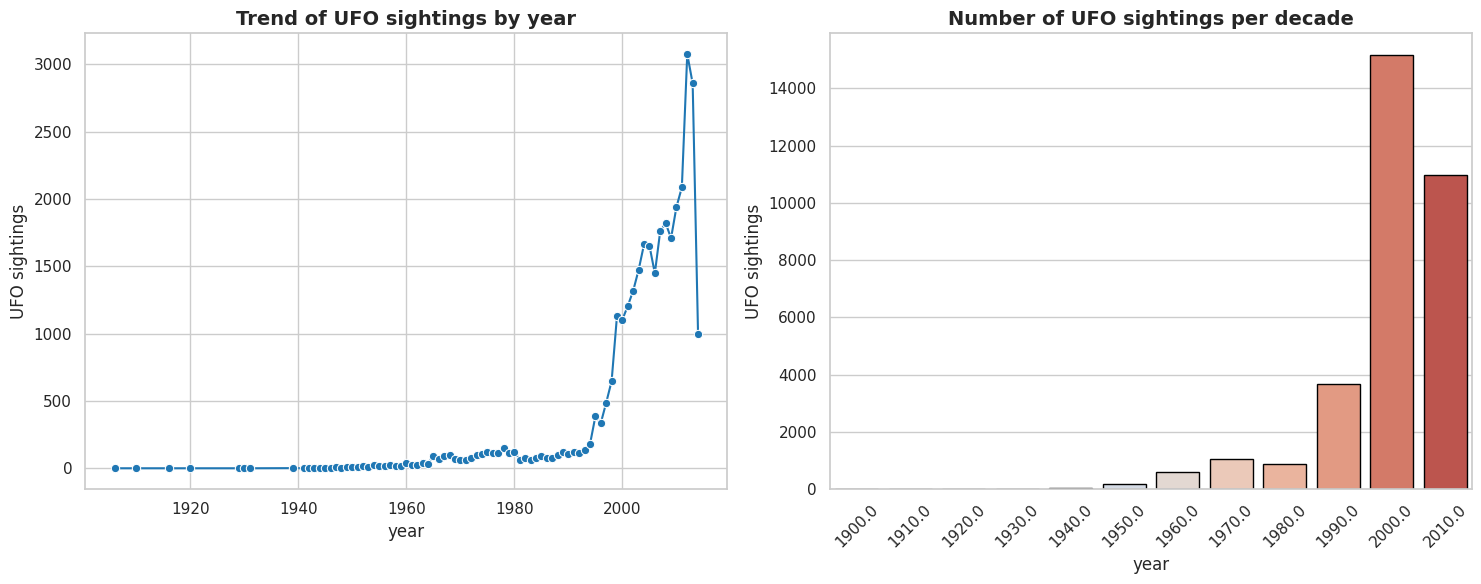

In [71]:

# datetime Ïª¨ÎüºÏùÑ ÎÇ†ÏßúÌòïÏúºÎ°ú Î≥ÄÌôò
UFO['datetime'] = pd.to_datetime(UFO['datetime'], errors='coerce', dayfirst=True)
UFO['year'] = UFO['datetime'].dt.year

# Ïú†Ìö®Ìïú Ïó∞ÎèÑÎßå ÌïÑÌÑ∞ÎßÅ (1900~2025)
UFO = UFO[(UFO['year'] >= 1900) & (UFO['year'] <= 2025)]

# Ïó∞ÎèÑÎ≥Ñ / 10ÎÖÑ Îã®ÏúÑ ÏßëÍ≥Ñ
yearly_counts = UFO['year'].value_counts().sort_index()
UFO['decade'] = (UFO['year'] // 10) * 10
decade_counts = UFO['decade'].value_counts().sort_index()

# ÏãúÍ∞ÅÌôî
plt.figure(figsize=(15, 6))

# Ïó∞ÎèÑÎ≥Ñ Í∑∏ÎûòÌîÑ
plt.subplot(1, 2, 1)
sns.lineplot(x=yearly_counts.index, y=yearly_counts.values,
             marker='o', color='#1f77b4')
plt.title('Trend of UFO sightings by year', fontsize=14, fontweight='bold')
plt.xlabel('year')
plt.ylabel('UFO sightings')

# 10ÎÖÑ Îã®ÏúÑ Í∑∏ÎûòÌîÑ
plt.subplot(1, 2, 2)
sns.barplot(x=decade_counts.index.astype(str), y=decade_counts.values,
            palette='coolwarm', edgecolor='black')
plt.title('Number of UFO sightings per decade', fontsize=14, fontweight='bold')
plt.xlabel('year')
plt.ylabel('UFO sightings')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

### 1990~ Ïù¥ÌõÑÎ°ú Í∏âÍ≤©ÌïòÍ≤å Î™©Í≤©ÏÇ¨Î°ÄÍ∞Ä Ï¶ùÍ∞ÄÌïòÍ≥† ÏûàÏäµÎãàÎã§. -> Î∞ÄÎ†àÎãàÏóÑ ÏãúÎåÄÎ•º ÏßÄÎÇòÎ©¥ UFOÏôÄ Í∞ôÏùÄ Ï¥àÏûêÏó∞Ï†Å ÏÇ¨Î°ÄÏóê ÎåÄÌïú Í¥ÄÏã¨Ïù¥ ÎÜíÏïÑÏßÄÎäî ÏÇ¨ÌöåÏ†Å ÌòÑÏÉÅ?

In [72]:
# country Ïª¨Îüº: Ï¢ÖÎ•òÏôÄ Î™á Ï¢ÖÏù∏ÏßÄ
country_counts = UFO['country'].value_counts(dropna=False)
print("Country Ï¢ÖÎ•ò Í∞úÏàò:", UFO['country'].nunique(dropna=True))
print("Country Ï¢ÖÎ•òÎ≥Ñ Í∞úÏàò:\n", country_counts)

print("\n" + "="*50 + "\n")

# shape Ïª¨Îüº: Ï¢ÖÎ•òÏôÄ Î™á Ï¢ÖÏù∏ÏßÄ
shape_counts = UFO['shape'].value_counts(dropna=False)
print("Shape Ï¢ÖÎ•ò Í∞úÏàò:", UFO['shape'].nunique(dropna=True))
print("Shape Ï¢ÖÎ•òÎ≥Ñ Í∞úÏàò:\n", shape_counts)

print("\n" + "="*50 + "\n")

# duration (seconds) Ïª¨Îüº: countryÎ≥Ñ ÌèâÍ∑†
# Î®ºÏ†Ä Ïà´ÏûêÎ°ú Î≥ÄÌôò (Î≥ÄÌôò Ïã§Ìå®Îäî NaN Ï≤òÎ¶¨)
UFO['duration (seconds)'] = pd.to_numeric(UFO['duration (seconds)'], errors='coerce')

duration_mean_by_country = UFO.groupby('country')['duration (seconds)'].mean().sort_values(ascending=False)
print("CountryÎ≥Ñ ÌèâÍ∑† duration (seconds):\n", duration_mean_by_country)

Country Ï¢ÖÎ•ò Í∞úÏàò: 5
Country Ï¢ÖÎ•òÎ≥Ñ Í∞úÏàò:
 country
us     26300
NaN     3931
ca      1148
gb       815
au       250
de        35
Name: count, dtype: int64


Shape Ï¢ÖÎ•ò Í∞úÏàò: 23
Shape Ï¢ÖÎ•òÎ≥Ñ Í∞úÏàò:
 shape
light        6687
triangle     3108
circle       3086
fireball     2553
other        2344
sphere       2255
unknown      2196
disk         2093
oval         1571
formation    1014
cigar         854
NaN           766
changing      742
cylinder      545
rectangle     509
flash         506
diamond       437
chevron       360
egg           322
teardrop      307
cone          125
cross          95
delta           3
pyramid         1
Name: count, dtype: int64


CountryÎ≥Ñ ÌèâÍ∑† duration (seconds):
 country
gb    122197.659018
ca     73097.531098
au      6856.010000
us      5517.333039
de      3011.142857
Name: duration (seconds), dtype: float64


/tmp/ipykernel_4850/1812768153.py:9: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




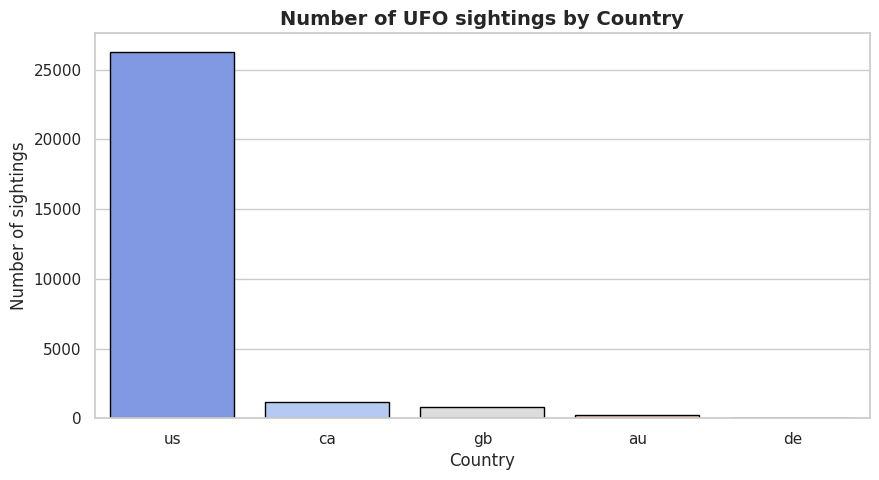

/tmp/ipykernel_4850/1812768153.py:18: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




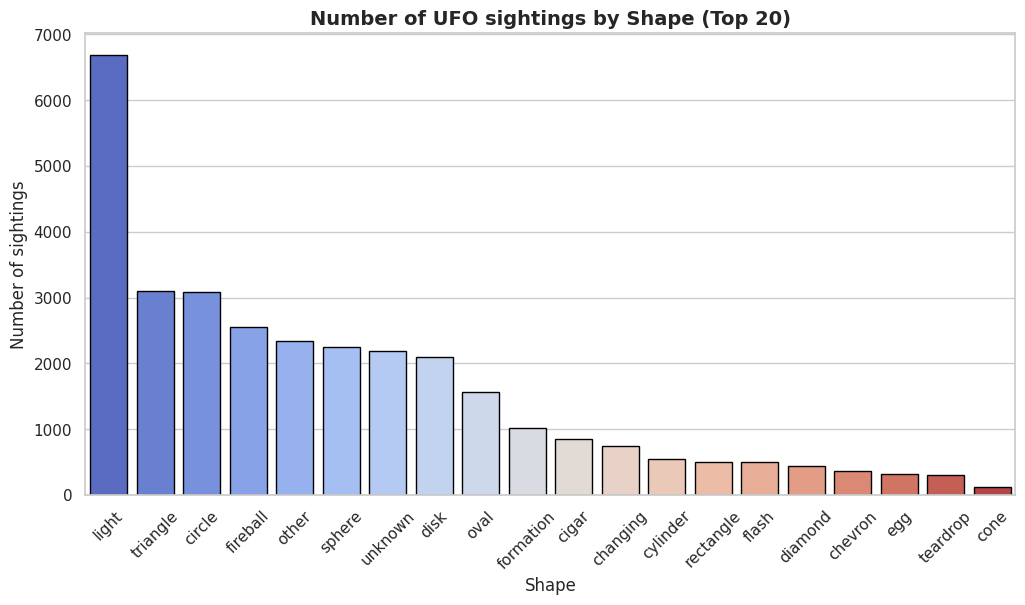

/tmp/ipykernel_4850/1812768153.py:28: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




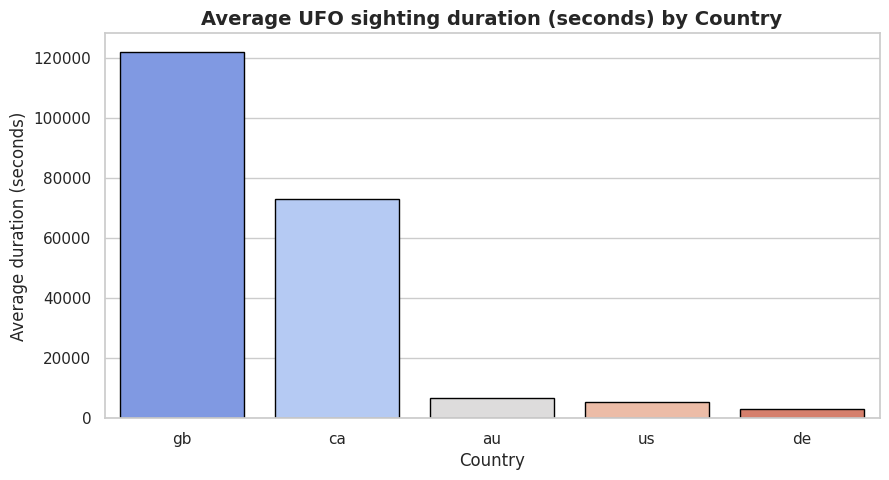

In [73]:
sns.set(style='whitegrid', palette='coolwarm')

# duration (seconds) Ïà´ÏûêÎ°ú Î≥ÄÌôò
UFO['duration (seconds)'] = pd.to_numeric(UFO['duration (seconds)'], errors='coerce')

# Country Ï¢ÖÎ•òÎ≥Ñ Í∞úÏàò
country_counts = UFO['country'].value_counts()
plt.figure(figsize=(10,5))
sns.barplot(x=country_counts.index, y=country_counts.values, palette='coolwarm', edgecolor='black')
plt.title('Number of UFO sightings by Country', fontsize=14, fontweight='bold')
plt.xlabel('Country')
plt.ylabel('Number of sightings')
plt.show()

# Shape Ï¢ÖÎ•òÎ≥Ñ Í∞úÏàò
shape_counts = UFO['shape'].value_counts().head(20)  # ÏÉÅÏúÑ 20Í∞úÎßå ÌëúÏãú
plt.figure(figsize=(12,6))
sns.barplot(x=shape_counts.index, y=shape_counts.values, palette='coolwarm', edgecolor='black')
plt.title('Number of UFO sightings by Shape (Top 20)', fontsize=14, fontweight='bold')
plt.xlabel('Shape')
plt.ylabel('Number of sightings')
plt.xticks(rotation=45)
plt.show()

# Duration(seconds) CountryÎ≥Ñ ÌèâÍ∑†
duration_mean_by_country = UFO.groupby('country')['duration (seconds)'].mean().sort_values(ascending=False)
plt.figure(figsize=(10,5))
sns.barplot(x=duration_mean_by_country.index, y=duration_mean_by_country.values,
            palette='coolwarm', edgecolor='black')
plt.title('Average UFO sighting duration (seconds) by Country', fontsize=14, fontweight='bold')
plt.xlabel('Country')
plt.ylabel('Average duration (seconds)')
plt.show()

### 
1. Íµ≠Í∞ÄÎ≥Ñ UFO Î™©Í≤© ÏÇ¨Î°Ä
ÎØ∏Íµ≠Ïù¥ ÏïïÎèÑÏ†ÅÏúºÎ°ú ÎÜíÏùå -> ÎØ∏Íµ≠ Î¨∏ÌôîÍ∂åÏóêÏÑú UFOÏóê ÎåÄÌïú Í¥ÄÏã¨Ïù¥ ÎÜíÎã§?

2. UFOÏùò ÌòïÌÉúÎ≥Ñ ÏÇ¨Î°Ä Î∂ÑÎ•ò
Îπõ ÌòïÌÉúÍ∞Ä Í∞ÄÏû• ÎßéÍ≥† 2ÏàúÏúÑÎ∂ÄÌÑ∞Îäî Ï∞®Ïù¥Í∞Ä Í∑∏Î†áÍ≤å ÌÅ¨ÏßÄÎäî ÏïäÏßÄÎßå ÏÇºÍ∞ÅÌòï ÌòïÌÉúÍ∞Ä 2ÏúÑ Ïù∏Í≤ÉÏùÄ ÍΩ§ ÌäπÏù¥ÌïòÎã§

3. Íµ≠Í∞ÄÎ≥Ñ UFO Î™©Í≤© ÏßÄÏÜçÏãúÍ∞Ñ ÌèâÍ∑†
561ÌñâÏóê duration Í∞í(97836000 (31ÎÖÑ))Ïù¥ ÎÑàÎ¨¥ ÌÅ∞ Îç∞Ïù¥ÌÑ∞ÎïåÎ¨∏Ïóê gbÍ∞íÏù¥ ÌäÑ ÎìØ Ìï©ÎãàÎã§.

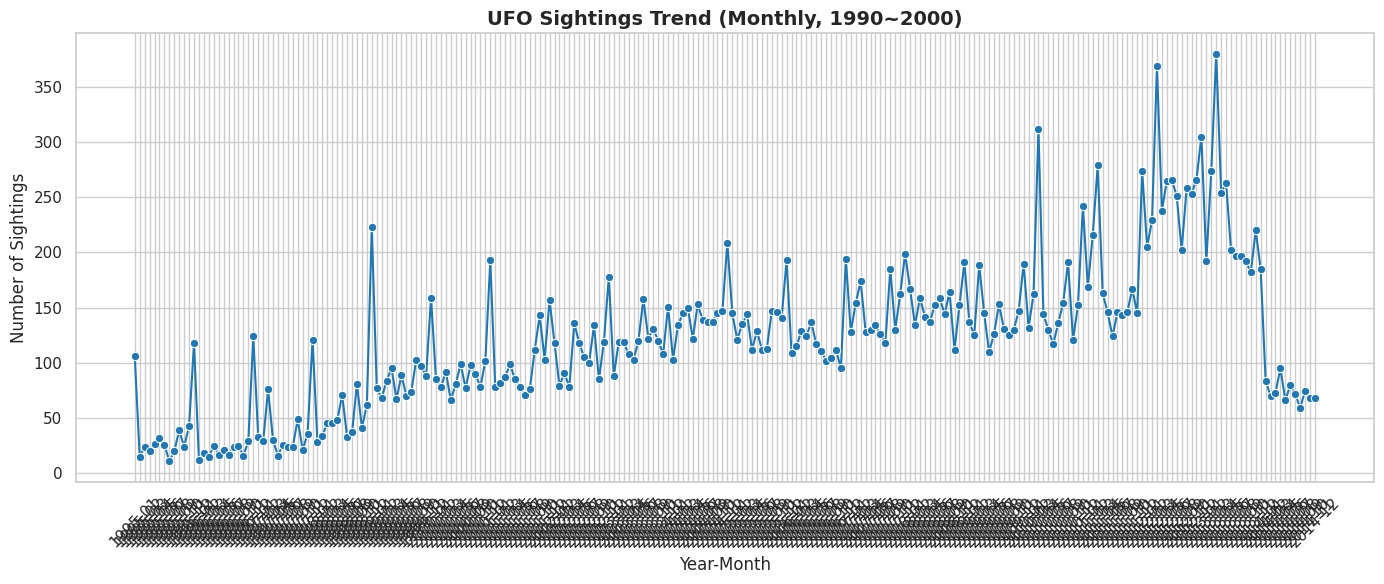

In [74]:
# Seaborn Ïä§ÌÉÄÏùº
sns.set(style='whitegrid', palette='coolwarm')

# datetime Ïª¨ÎüºÏùÑ ÎÇ†ÏßúÌòïÏúºÎ°ú Î≥ÄÌôò
UFO['datetime'] = pd.to_datetime(UFO['datetime'], errors='coerce', dayfirst=True)

# 1995~2014 ÏÇ¨Ïù¥ Îç∞Ïù¥ÌÑ∞Îßå ÌïÑÌÑ∞ÎßÅ
UFO = UFO[(UFO['datetime'].dt.year >= 1995) & (UFO['datetime'].dt.year <= 2014)]

# Ïó∞-Ïõî Îã®ÏúÑ Ïª¨Îüº ÏÉùÏÑ±
UFO['year_month'] = UFO['datetime'].dt.to_period('M')

# ÏõîÎ≥Ñ UFO Î™©Í≤© Í±¥Ïàò ÏßëÍ≥Ñ
monthly_counts = UFO['year_month'].value_counts().sort_index()

# ÏãúÍ∞ÅÌôî
plt.figure(figsize=(14,6))
sns.lineplot(x=monthly_counts.index.astype(str), y=monthly_counts.values, marker='o', color='#1f77b4')
plt.title('UFO Sightings Trend (Monthly, 1990~2000)', fontsize=14, fontweight='bold')
plt.xlabel('Year-Month')
plt.ylabel('Number of Sightings')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Î≠îÍ∞Ä ÌäπÏù¥Ìïú Ï†êÏù¥ ÏûàÍ∏¥ ÌïúÎç∞ ÏïÑÎûòÏ™ΩÏù¥ ÎÑàÎ¨¥ Ï¥òÏ¥òÌï¥ÏÑú Î≥¥Ïù¥Ïßà ÏïäÏùå.

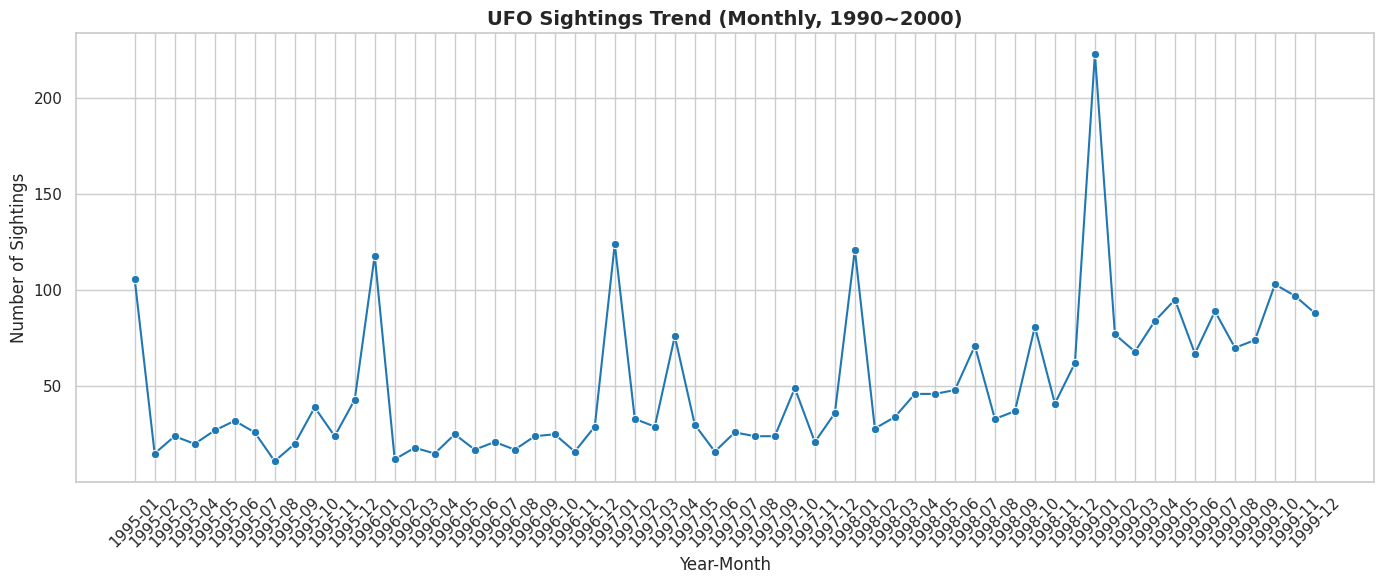

In [75]:
# Seaborn Ïä§ÌÉÄÏùº
sns.set(style='whitegrid', palette='coolwarm')

# 1990~2000 ÏÇ¨Ïù¥ Îç∞Ïù¥ÌÑ∞Îßå ÌïÑÌÑ∞ÎßÅ
UFO = UFO[(UFO['datetime'].dt.year >= 1995) & (UFO['datetime'].dt.year <= 1999)]

# Ïó∞-Ïõî Îã®ÏúÑ Ïª¨Îüº ÏÉùÏÑ±
UFO['year_month'] = UFO['datetime'].dt.to_period('M')

# ÏõîÎ≥Ñ UFO Î™©Í≤© Í±¥Ïàò ÏßëÍ≥Ñ
monthly_counts = UFO['year_month'].value_counts().sort_index()

# ÏãúÍ∞ÅÌôî
plt.figure(figsize=(14,6))
sns.lineplot(x=monthly_counts.index.astype(str), y=monthly_counts.values, marker='o', color='#1f77b4')
plt.title('UFO Sightings Trend (Monthly, 1990~2000)', fontsize=14, fontweight='bold')
plt.xlabel('Year-Month')
plt.ylabel('Number of Sightings')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Ïù¥ÏÉÅÌïòÍ≤å 12Ïõî Îã¨ÏóêÎßå UFOÎ™©Í≤©Îã¥Ïù¥ ÎßéÎã§.

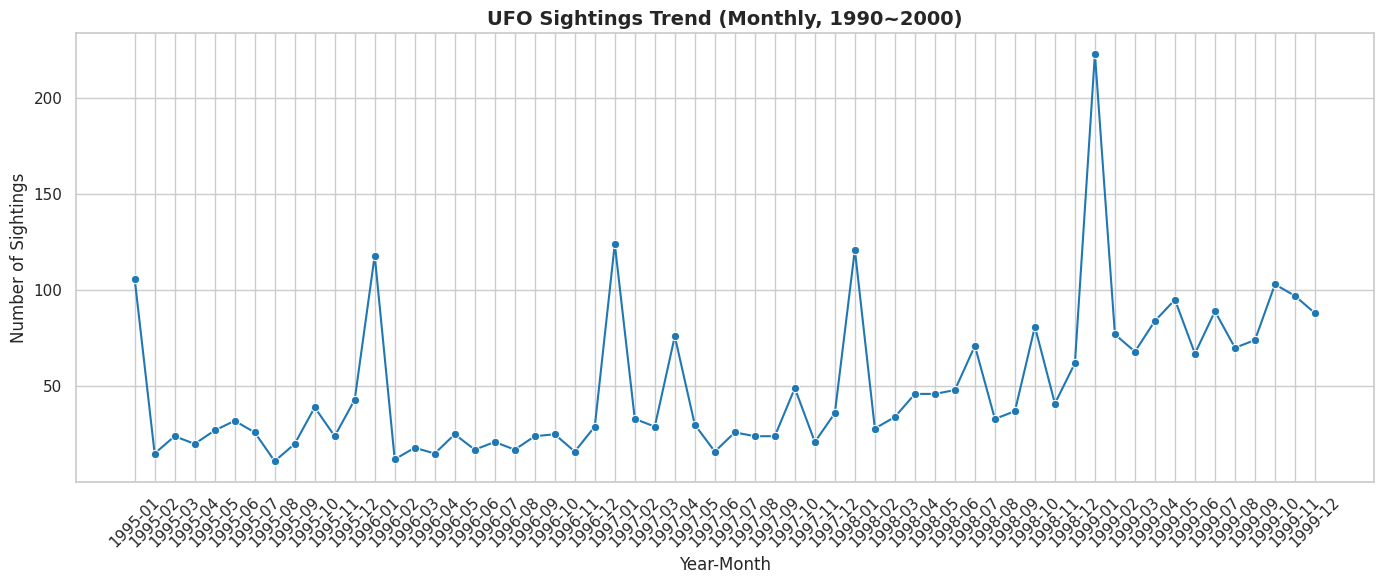

In [76]:
# Seaborn Ïä§ÌÉÄÏùº
sns.set(style='whitegrid', palette='coolwarm')

# 1990~2000 ÏÇ¨Ïù¥ Îç∞Ïù¥ÌÑ∞Îßå ÌïÑÌÑ∞ÎßÅ
UFO = UFO[(UFO['datetime'].dt.year >= 1995) & (UFO['datetime'].dt.year <= 2000)]

# Ïó∞-Ïõî Îã®ÏúÑ Ïª¨Îüº ÏÉùÏÑ±
UFO['year_month'] = UFO['datetime'].dt.to_period('M')

# ÏõîÎ≥Ñ UFO Î™©Í≤© Í±¥Ïàò ÏßëÍ≥Ñ
monthly_counts = UFO['year_month'].value_counts().sort_index()

# ÏãúÍ∞ÅÌôî
plt.figure(figsize=(14,6))
sns.lineplot(x=monthly_counts.index.astype(str), y=monthly_counts.values, marker='o', color='#1f77b4')
plt.title('UFO Sightings Trend (Monthly, 1990~2000)', fontsize=14, fontweight='bold')
plt.xlabel('Year-Month')
plt.ylabel('Number of Sightings')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

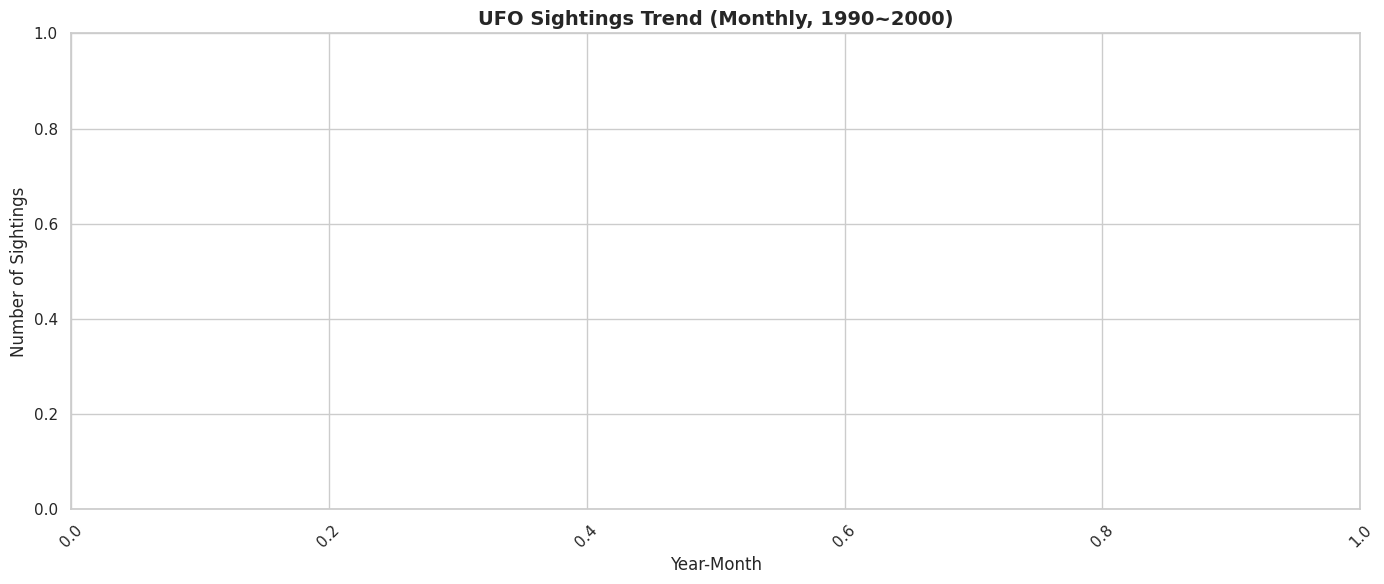

In [77]:
# Seaborn Ïä§ÌÉÄÏùº
sns.set(style='whitegrid', palette='coolwarm')

# 1990~2000 ÏÇ¨Ïù¥ Îç∞Ïù¥ÌÑ∞Îßå ÌïÑÌÑ∞ÎßÅ
UFO = UFO[(UFO['datetime'].dt.year >= 2001) & (UFO['datetime'].dt.year <= 2002)]

# Ïó∞-Ïõî Îã®ÏúÑ Ïª¨Îüº ÏÉùÏÑ±
UFO['year_month'] = UFO['datetime'].dt.to_period('M')

# ÏõîÎ≥Ñ UFO Î™©Í≤© Í±¥Ïàò ÏßëÍ≥Ñ
monthly_counts = UFO['year_month'].value_counts().sort_index()

# ÏãúÍ∞ÅÌôî
plt.figure(figsize=(14,6))
sns.lineplot(x=monthly_counts.index.astype(str), y=monthly_counts.values, marker='o', color='#1f77b4')
plt.title('UFO Sightings Trend (Monthly, 1990~2000)', fontsize=14, fontweight='bold')
plt.xlabel('Year-Month')
plt.ylabel('Number of Sightings')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### 911ÌÖåÎü¨ ÎãπÏãú Îâ¥Ïä§ÏòÅÏÉÅÏóê UFOÍ∞Ä Ï∞çÌòîÎã§Îäî ÏÜåÎ¨∏ÏúºÎ°ú Ïù∏Ìï¥ UFOÎ™©Í≤© Ïã†Í≥†Í∞Ä ÏùºÏãúÏ†ÅÏúºÎ°ú Ï¶ùÍ∞ÄÌñàÎã§Îäî ÏñòÍ∏∞Í∞Ä ÏûàÎäîÎç∞ Ïã§Ï†úÎ°ú Ï°∞Í∏à Ï¶ùÍ∞ÄÌïúÍ≤ÉÏùÄ ÌôïÏù∏ÎêúÎã§.

In [78]:
# comments Ïª¨Îüº Ìï©ÏπòÍ∏∞
text = " ".join(comment for comment in UFO['comments'].dropna())

# Î∂àÏö©Ïñ¥(Stopwords) ÏÑ§Ï†ï
stopwords = set(STOPWORDS)
# ÌïÑÏöîÌïòÎ©¥ 'the', 'a', 'and' Í∞ôÏùÄ ÏùºÎ∞ò Îã®Ïñ¥ Ï∂îÍ∞Ä
stopwords.update(['the', 'a', 'and', 'of', 'to', 'in', 'on', 'with', 'is'])

# WordCloud ÏÉùÏÑ±
wordcloud = WordCloud(
    width=1200,
    height=600,
    background_color='white',
    stopwords=stopwords,
    collocations=True,  # ÎèôÏùº Îã®Ïñ¥ Î¨∂Í∏∞ ÌóàÏö©
    colormap='coolwarm'
).generate(text)

# ÏãúÍ∞ÅÌôî
plt.figure(figsize=(15,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('WordCloud of UFO Comments', fontsize=20, fontweight='bold')
plt.show()


ValueError: We need at least 1 word to plot a word cloud, got 0.

### commentsÏóê Ïñ∏Í∏âÎêú ÌÇ§ÏõåÎìú Í∞ØÏàò wordcloud

In [ ]:
# Îç∞Ïù¥ÌÑ∞ Î∂àÎü¨Ïò§Í∏∞
# ÌååÏùº Í≤ΩÎ°úÍ∞Ä Î°úÏª¨ ÌôòÍ≤ΩÏóê ÎßûÍ≤å ÏßÄÏ†ïÎêòÏóàÎäîÏßÄ ÌôïÏù∏ÌïòÏÑ∏Ïöî.
file_path = '/home/yj/dev_ws/project_UFO/data/scrubbed.csv'
df = pd.read_csv(file_path, low_memory=False)

# 'country' Ïª¨Îüº Ï†ÑÏ≤òÎ¶¨ (ÎåÄÎ¨∏ÏûêÎ°ú ÌÜµÏùº)
df['country'] = df['country'].str.upper()

# Íµ≠Í∞ÄÎ≥Ñ Î™©Í≤© ÏÇ¨Î°Ä ÏãúÍ∞ÅÌôî (ÏÑ∏Í≥Ñ ÏßÄÎèÑ)
print("--- üó∫Ô∏è Íµ≠Í∞ÄÎ≥Ñ Î™©Í≤© ÏÇ¨Î°Ä ÏãúÍ∞ÅÌôî ---")

# Íµ≠Í∞ÄÎ≥Ñ Î™©Í≤© ÌöüÏàò Í≥ÑÏÇ∞
country_counts = df['country'].value_counts().reset_index()
country_counts.columns = ['country_iso2', 'count']

# ISO 2 ÏΩîÎìúÎ•º PlotlyÍ∞Ä ÏßÄÏõêÌïòÎäî ISO 3 ÏΩîÎìúÎ°ú Î≥ÄÌôòÌïòÎäî Îß§Ìïë ÌÖåÏù¥Î∏î Ï†ïÏùò
iso2_to_iso3 = {
    'US': 'USA',  # United States
    'CA': 'CAN',  # Canada
    'GB': 'GBR',  # United Kingdom
    'AU': 'AUS',  # Australia
    'DE': 'DEU',  # Germany
    # Îç∞Ïù¥ÌÑ∞ÏÖãÏóê Ìè¨Ìï®Îêú Í∏∞ÌÉÄ Íµ≠Í∞Ä ÏΩîÎìúÍ∞Ä ÏûàÎã§Î©¥ Ïó¨Í∏∞Ïóê Ï∂îÍ∞ÄÌï©ÎãàÎã§.
}

# ISO-3 ÏΩîÎìú Ïª¨Îüº Ï∂îÍ∞Ä Î∞è Í≤∞Ï∏°Ïπò Ï†úÍ±∞
country_counts['country_iso3'] = country_counts['country_iso2'].map(iso2_to_iso3)
country_counts_mapped = country_counts.dropna(subset=['country_iso3'])


# Plotly Choropleth ÏßÄÎèÑ ÏÉùÏÑ±
fig_map = px.choropleth(
    country_counts_mapped, # Îß§ÌïëÎêú Îç∞Ïù¥ÌÑ∞Î•º ÏÇ¨Ïö©
    locations='country_iso3',  # ISO 3 ÏΩîÎìú Ïª¨Îüº ÏßÄÏ†ï
    color='count',        
    hover_name='country_iso2', # ÎßàÏö∞Ïä§Î•º Ïò¨Î†∏ÏùÑ Îïå ISO 2 ÏΩîÎìúÎ•º ÌëúÏãú
    color_continuous_scale=px.colors.sequential.Plasma, 
    title='UFO numbers by Country',
    locationmode='ISO-3' # **ISO-3Î°ú Î≥ÄÍ≤ΩÌïòÏó¨ ValueError Ìï¥Í≤∞**
)

# ÏßÄÎèÑÎ•º Ïõπ Î∏åÎùºÏö∞Ï†ÄÎ°ú Ï∂úÎ†•
fig_map.show()


--- üó∫Ô∏è Íµ≠Í∞ÄÎ≥Ñ Î™©Í≤© ÏÇ¨Î°Ä ÏãúÍ∞ÅÌôî ---


### ÎØ∏Íµ≠ >>>> Ìò∏Ï£º Ï∫êÎÇòÎã§ Ïú†ÎüΩÍ∂å >> Í∏∞ÌÉÄ Íµ≠Í∞ÄÎì§ Ïù¥ÎùºÏÑú ÎØ∏Íµ≠Ïô∏ÏóêÎäî ÌÅ∞ ÏùòÎØ∏Í∞Ä ÏóÜÎã§Í≥† ÌåêÎã®ÎêúÎã§.

--- üõ∏ Íµ≠Í∞ÄÎ≥Ñ Top 5 Î™©Í≤© ÌòïÌÉú ---

[US]
   shape  count
   light  13473
triangle   6549
 unknown   6120
  circle   6118
fireball   5148

[CA]
   shape  count
   light    655
  circle    284
triangle    268
 unknown    252
   other    241

[GB]
   shape  count
   light    361
  circle    243
triangle    169
  sphere    158
 unknown    142

[AU]
   shape  count
   light    119
  circle     62
    disk     50
triangle     43
   other     40

[DE]
   shape  count
   light     20
  circle     10
 unknown     10
triangle      9
   other      9


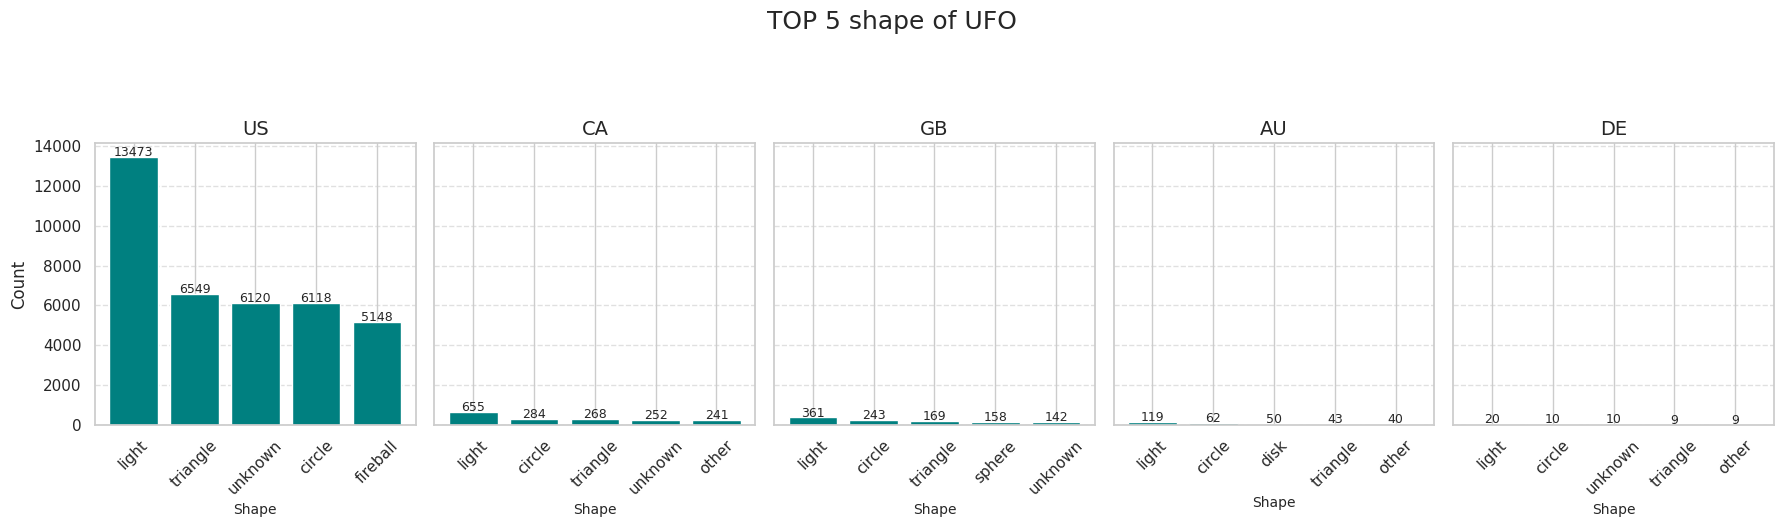

In [ ]:
# Îç∞Ïù¥ÌÑ∞ Î∂àÎü¨Ïò§Í∏∞ (Ïù¥Ï†Ñ ÏΩîÎìúÏóêÏÑú Î°úÎìúÎêú df ÏÇ¨Ïö©ÏùÑ Í∞ÄÏ†ï)
file_path = '/home/yj/dev_ws/project_UFO/data/scrubbed.csv'
df = pd.read_csv(file_path, low_memory=False)

# 'country' Î∞è 'shape' Ïª¨Îüº Ï†ÑÏ≤òÎ¶¨
df['country'] = df['country'].str.upper()
df['shape'] = df['shape'].fillna('unknown').str.lower()

# Ï£ºÏöî 5Í∞ú Íµ≠Í∞ÄÎßå ÌïÑÌÑ∞ÎßÅ
main_countries = ['US', 'CA', 'GB', 'AU', 'DE']
df_filtered = df[df['country'].isin(main_countries)]

# Íµ≠Í∞ÄÎ≥Ñ, ÌòïÌÉúÎ≥Ñ ÏßëÍ≥Ñ Î∞è Top 5 ÌòïÌÉú Ï∂îÏ∂ú
# Íµ≠Í∞Ä Î∞è ÌòïÌÉúÎ≥Ñ Î™©Í≤© ÌöüÏàòÎ•º ÏßëÍ≥Ñ
country_shape_counts = df_filtered.groupby(['country', 'shape']).size().reset_index(name='count')

# Í∞Å Íµ≠Í∞ÄÎ≥Ñ Top 5 ÌòïÌÉúÎ•º Ï†ÄÏû•Ìï† ÎîïÏÖîÎÑàÎ¶¨ Ï¥àÍ∏∞Ìôî
top5_shapes_per_country = {}

for country in main_countries:
    # Ìï¥Îãπ Íµ≠Í∞ÄÏùò Îç∞Ïù¥ÌÑ∞Îßå ÌïÑÌÑ∞ÎßÅ
    country_data = country_shape_counts[country_shape_counts['country'] == country]
    
    # 'count' Í∏∞Ï§ÄÏúºÎ°ú ÎÇ¥Î¶ºÏ∞®Ïàú Ï†ïÎ†¨ ÌõÑ ÏÉÅÏúÑ 5Í∞ú Ï∂îÏ∂ú
    top5 = country_data.sort_values(by='count', ascending=False).head(5)
    top5_shapes_per_country[country] = top5

print("--- üõ∏ Íµ≠Í∞ÄÎ≥Ñ Top 5 Î™©Í≤© ÌòïÌÉú ---")
for country, data in top5_shapes_per_country.items():
    print(f"\n[{country}]")
    print(data[['shape', 'count']].to_string(index=False))


# ÏÑúÎ∏åÌîåÎ°Ø(Subplots)ÏùÑ Ïù¥Ïö©Ìïú ÏãúÍ∞ÅÌôî
fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(18, 5), sharey=True)
fig.suptitle('TOP 5 shape of UFO', fontsize=18, y=1.05)

# ÏÑúÎ∏åÌîåÎ°ØÏóê Îç∞Ïù¥ÌÑ∞ ÌîåÎ°úÌåÖ
for i, country in enumerate(main_countries):
    # i: 0Î∂ÄÌÑ∞ 4, country: 'US', 'CA', 'GB', 'AU', 'DE'
    ax = axes[i]
    data = top5_shapes_per_country[country]
    
    # ÎßâÎåÄ Í∑∏ÎûòÌîÑ ÏÉùÏÑ±
    ax.bar(data['shape'], data['count'], color='teal')
    
    # Í∞Å ÎßâÎåÄ ÏúÑÏóê ÌöüÏàò ÌëúÏãú
    for j, count in enumerate(data['count']):
        ax.text(j, count + 50, str(count), ha='center', fontsize=9)
        
    ax.set_title(country, fontsize=14)
    ax.tick_params(axis='x', rotation=45)
    ax.set_xlabel('Shape', fontsize=10)
    ax.grid(axis='y', linestyle='--', alpha=0.6)

# yÏ∂ï Î†àÏù¥Î∏îÏùÄ Ï≤´ Î≤àÏß∏ ÏÑúÎ∏åÌîåÎ°ØÏóêÎßå ÌëúÏãú
axes[0].set_ylabel('Count', fontsize=12)

plt.tight_layout(rect=[0, 0, 1, 0.95]) # supertitle Í≥µÍ∞Ñ ÌôïÎ≥¥
plt.show()

In [ ]:
df = pd.read_csv('/home/yj/dev_ws/project_UFO/data/scrubbed.csv', low_memory=False)

In [ ]:
df.head()
df.columns

Index(['datetime', 'city', 'state', 'country', 'shape', 'duration (seconds)',
       'duration (hours/min)', 'comments', 'date posted', 'latitude',
       'longitude '],
      dtype='object')

In [ ]:

# datetime Ïª¨ÎüºÏùÑ ÎÇ†ÏßúÌòïÏúºÎ°ú Î≥ÄÌôò
df["datetime"] = pd.to_datetime(df["datetime"], errors="coerce")

# ÏöîÏùº Ïª¨Îüº ÏÉùÏÑ± (Monday, Tuesday ...)
df["weekday"] = df["datetime"].dt.day_name()

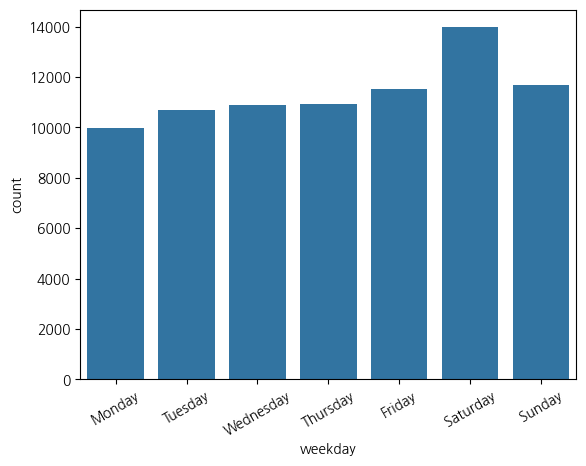

In [ ]:
sns.countplot(data=df, x="weekday",
              order=["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"])
plt.xticks(rotation=30)
plt.show()

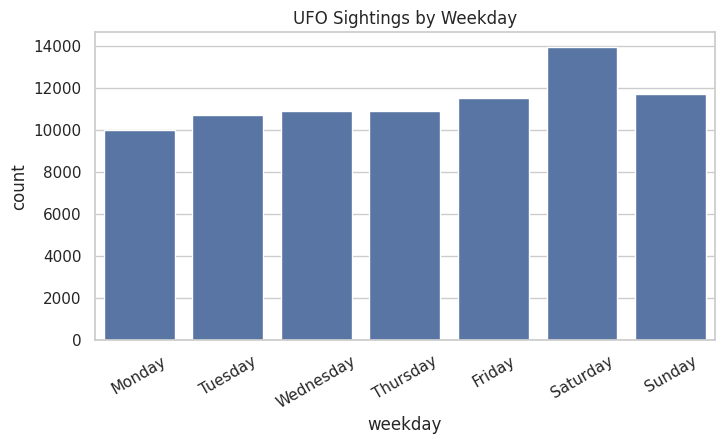

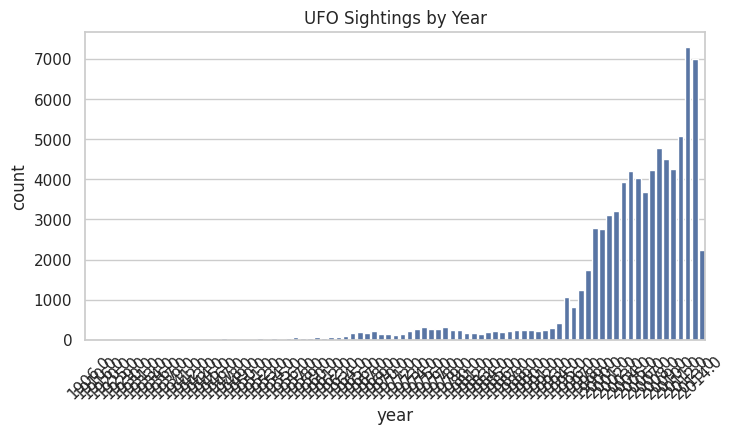

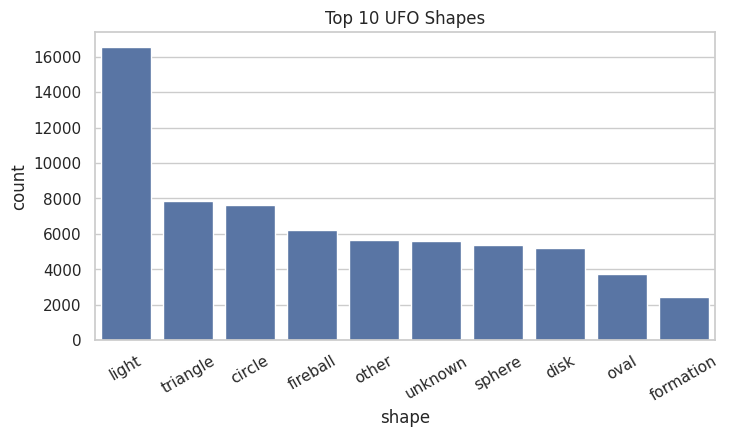

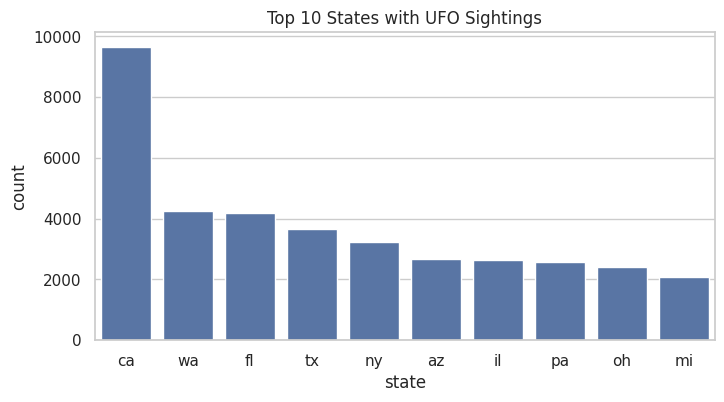

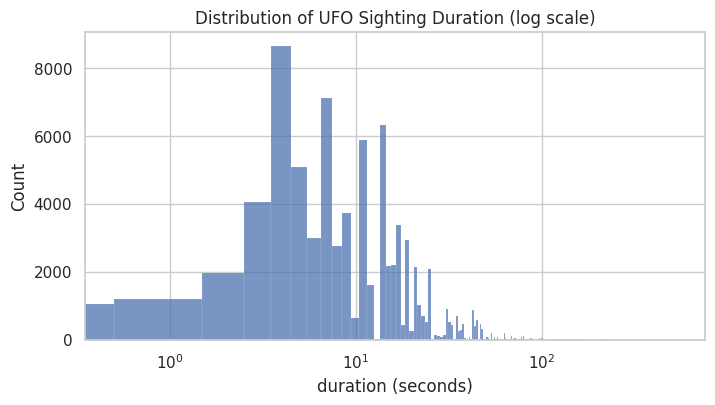

In [ ]:
sns.set_theme(style="whitegrid")

# ÏöîÏùºÎ≥Ñ Î™©Í≤© ÎπàÎèÑ
plt.figure(figsize=(8,4))
sns.countplot(data=df, x="weekday",
              order=["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"])
plt.title("UFO Sightings by Weekday")
plt.xticks(rotation=30)
plt.show()

# Ïó∞ÎèÑÎ≥Ñ Î™©Í≤© Ï∂îÏÑ∏
plt.figure(figsize=(8,4))
sns.countplot(data=df, x="year")
plt.title("UFO Sightings by Year")
plt.xticks(rotation=45)
plt.show()

# Shape(Î™©Í≤© ÌòïÌÉú)Î≥Ñ ÎπàÎèÑ Top 10
top_shape = df["shape"].value_counts().index[:10]
plt.figure(figsize=(8,4))
sns.countplot(data=df[df["shape"].isin(top_shape)], x="shape",
              order=top_shape)
plt.title("Top 10 UFO Shapes")
plt.xticks(rotation=30)
plt.show()

# StateÎ≥Ñ Î™©Í≤© ÎπàÎèÑ Top 10
top_state = df["state"].value_counts().index[:10]
plt.figure(figsize=(8,4))
sns.countplot(data=df[df["state"].isin(top_state)], x="state",
              order=top_state)
plt.title("Top 10 States with UFO Sightings")
plt.show()

# ÏßÄÏÜçÏãúÍ∞Ñ (seconds) Î∂ÑÌè¨
plt.figure(figsize=(8,4))
sns.histplot(data=df, x="duration (seconds)", bins=50)
plt.xscale("log")  # Í∏¥ tail ÎïåÎ¨∏Ïóê log scale Ï∂îÏ≤ú
plt.title("Distribution of UFO Sighting Duration (log scale)")
plt.show()

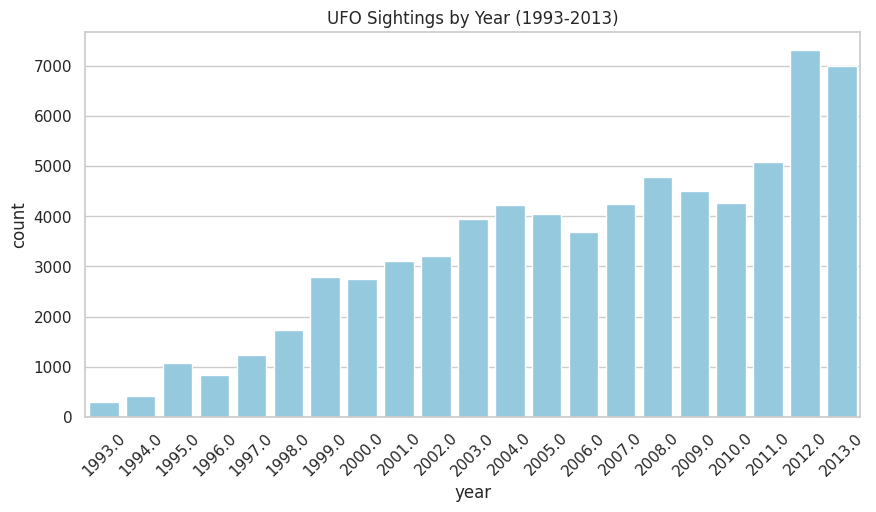

In [ ]:
df_filtered = df[(df['year'] >= 1993) & (df['year'] <= 2013)]

plt.figure(figsize=(10,5))
sns.countplot(data=df_filtered, x="year", color="skyblue")
plt.title("UFO Sightings by Year (1993-2013)")
plt.xticks(rotation=45)
plt.show()

In [ ]:
df['state'].value_counts().head(20)

state
ca    9655
wa    4268
fl    4200
tx    3677
ny    3219
az    2689
il    2645
pa    2582
oh    2425
mi    2071
nc    1869
or    1845
on    1584
mo    1576
nj    1512
co    1505
va    1393
in    1386
ma    1358
ga    1347
Name: count, dtype: int64

In [ ]:
df['country'].value_counts()

country
us    65114
ca     3000
gb     1905
au      538
de      105
Name: count, dtype: int64

In [ ]:
print(df_state[["state","iso_code","count"]])

   state iso_code  count
0     CA    US-CA   9655
1     WA    US-WA   4268
2     FL    US-FL   4200
3     TX    US-TX   3677
4     NY    US-NY   3219
5     AZ    US-AZ   2689
6     IL    US-IL   2645
7     PA    US-PA   2582
8     OH    US-OH   2425
9     MI    US-MI   2071
10    NC    US-NC   1869
11    OR    US-OR   1845
12    MO    US-MO   1576
13    NJ    US-NJ   1512
14    CO    US-CO   1505
15    VA    US-VA   1393
16    IN    US-IN   1386
17    MA    US-MA   1358
18    GA    US-GA   1347


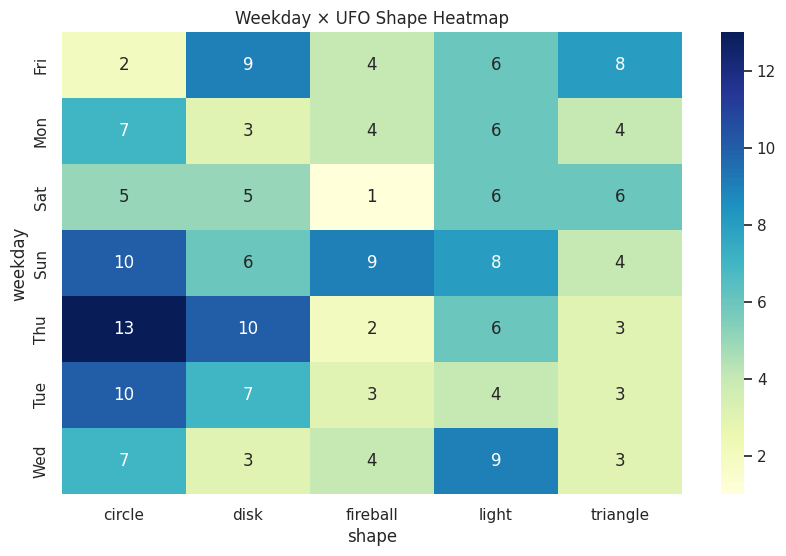

/tmp/ipykernel_4850/433107442.py:73: FutureWarning:

'M' is deprecated and will be removed in a future version, please use 'ME' instead.



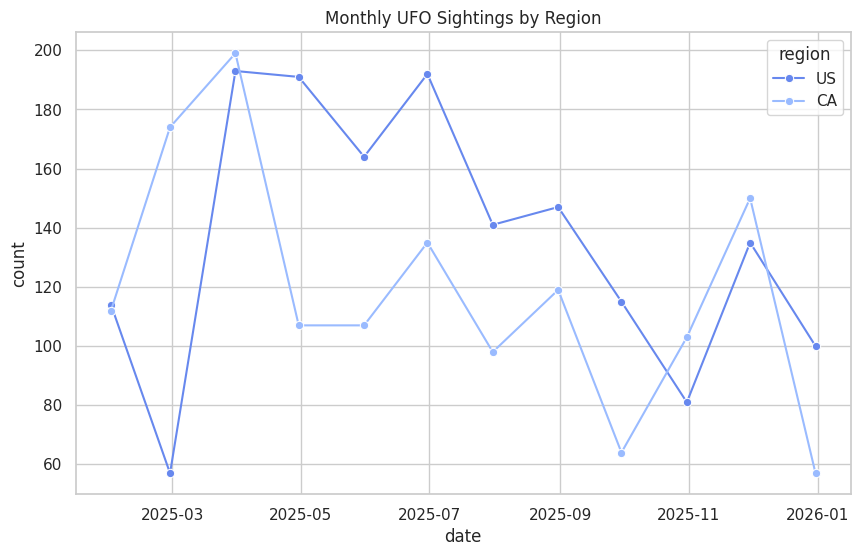

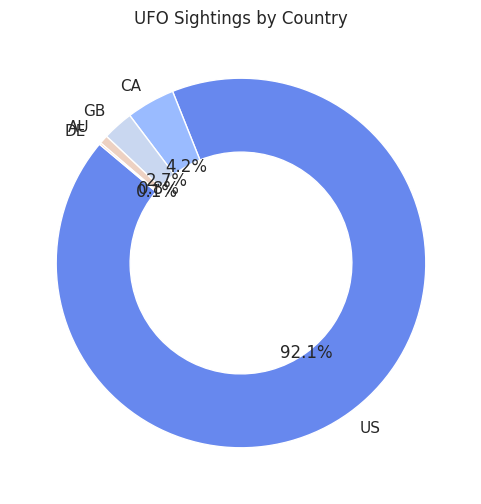

In [ ]:
import folium
import plotly.express as px

fig = px.choropleth(
    df_state,
    locations="iso_code",
    color="count",
    scope="usa",
    hover_name="state",
    color_continuous_scale="Reds",
    labels={"count":"UFO Sightings"},
    color_continuous_midpoint=np.median(df_state["count"])
)
fig.show()

state_data = {
    "state": ["CA", "WA", "FL", "TX", "NY", "AZ", "IL", "PA", "OH", "MI",
              "NC", "OR", "MO", "NJ", "CO", "VA", "IN", "MA", "GA"],
    "count": [9655, 4268, 4200, 3677, 3219, 2689, 2645, 2582, 2425, 2071,
              1869, 1845, 1576, 1512, 1505, 1393, 1386, 1358, 1347]
}
df_state = pd.DataFrame(state_data)

# ÎØ∏Íµ≠ Ï£º Ï§ëÏã¨ Ï¢åÌëú (FoliumÏö©)
state_coords = {
    "CA": [36.7783, -119.4179], "WA": [47.7511, -120.7401], "FL": [27.9944, -81.7603],
    "TX": [31.9686, -99.9018], "NY": [43.2994, -74.2179], "AZ": [34.0489, -111.0937],
    "IL": [40.6331, -89.3985], "PA": [41.2033, -77.1945], "OH": [40.4173, -82.9071],
    "MI": [44.1822, -84.5068], "NC": [35.7596, -79.0193], "OR": [43.8041, -120.5542],
    "MO": [37.9643, -91.8318], "NJ": [40.0583, -74.4057], "CO": [39.5501, -105.7821],
    "VA": [37.4316, -78.6569], "IN": [40.2672, -86.1349], "MA": [42.4072, -71.3824],
    "GA": [32.1656, -82.9001]
}
df_state["lat"] = df_state["state"].map(lambda x: state_coords.get(x, [None, None])[0])
df_state["lon"] = df_state["state"].map(lambda x: state_coords.get(x, [None, None])[1])

# PlotlyÏö© ISO ÏΩîÎìú
us_iso_codes = {k: f"US-{k}" for k in df_state["state"]}
df_state["iso_code"] = df_state["state"].map(us_iso_codes)

# country Îç∞Ïù¥ÌÑ∞
country_data = {
    "country": ["US", "CA", "GB", "AU", "DE"],
    "count": [65114, 3000, 1905, 538, 105]
}
df_country = pd.DataFrame(country_data)
country_iso3 = {"US": "USA", "CA": "CAN", "GB": "GBR", "AU": "AUS", "DE": "DEU"}
df_country["iso_code"] = df_country["country"].map(country_iso3)

# ÏòàÏãú weekday √ó shape Îç∞Ïù¥ÌÑ∞ (ÎûúÎç§ ÏÉùÏÑ±)
import numpy as np
shapes = ["circle", "triangle", "disk", "light", "fireball"]
weekdays = ["Mon","Tue","Wed","Thu","Fri","Sat","Sun"]
np.random.seed(42)
df_weekday_shape = pd.DataFrame({
    "weekday": np.random.choice(weekdays, 200),
    "shape": np.random.choice(shapes, 200)
})

# weekday √ó shape ÍµêÏ∞®Ìëú ÌûàÌä∏Îßµ (ÏÉà Î∞©Ïãù)

plt.figure(figsize=(10,6))
cross = pd.crosstab(df_weekday_shape["weekday"], df_weekday_shape["shape"])
sns.heatmap(cross, annot=True, fmt="d", cmap="YlGnBu")
plt.title("Weekday √ó UFO Shape Heatmap")
plt.show()


# ÏãúÍ≥ÑÏó¥ grouped lineplot (ÏòàÏãú)

# ÏòàÏãú ÏãúÍ≥ÑÏó¥ Îç∞Ïù¥ÌÑ∞
dates = pd.date_range(start="2025-01-01", periods=12, freq="M")
df_time = pd.DataFrame({
    "date": np.tile(dates, 2),
    "count": np.random.randint(50,200,24),
    "region": ["US"]*12 + ["CA"]*12
})
plt.figure(figsize=(10,6))
sns.lineplot(data=df_time, x="date", y="count", hue="region", marker="o")
plt.title("Monthly UFO Sightings by Region")
plt.show()

# country donut chart (matplotlib)

plt.figure(figsize=(6,6))
plt.pie(df_country["count"], labels=df_country["country"], autopct="%1.1f%%", startangle=140, wedgeprops=dict(width=0.4))
plt.title("UFO Sightings by Country")
plt.show()


# Folium UFO sighting map

m = folium.Map(location=[39.8283, -98.5795], zoom_start=4)  # ÎØ∏Íµ≠ Ï§ëÏã¨
for _, row in df_state.iterrows():
    folium.CircleMarker(
        location=[row["lat"], row["lon"]],
        radius=row["count"]/2000,  # ÌÅ¨Í∏∞ Ï°∞Ï†ï
        color="red",
        fill=True,
        fill_opacity=0.6,
        popup=f"{row['state']}: {row['count']}"
    ).add_to(m)
m.save("ufo_folium_map.html")  # HTML ÌååÏùºÎ°ú Ï†ÄÏû•
m  # Jupyter NotebookÏóêÏÑú Î∞îÎ°ú Ï∂úÎ†• Í∞ÄÎä•


# Plotly choropleth (state or country)

# ÎØ∏Íµ≠ Ï£ºÎ≥Ñ choropleth
fig = px.choropleth(df_state,
                    locations="iso_code",
                    color="count",
                    scope="usa",
                    hover_name="state",
                    color_continuous_scale="Reds",
                    labels={"count":"UFO Sightings"})
fig.show()

# Íµ≠Í∞ÄÎ≥Ñ choropleth
fig2 = px.choropleth(df_country,
                     locations="iso_code",
                     color="count",
                     hover_name="country",
                     color_continuous_scale="Blues",
                     labels={"count":"UFO Sightings"})
fig2.show()

/tmp/ipykernel_4850/3802231556.py:3: DtypeWarning:

Columns (5,9) have mixed types. Specify dtype option on import or set low_memory=False.

/tmp/ipykernel_4850/3802231556.py:27: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




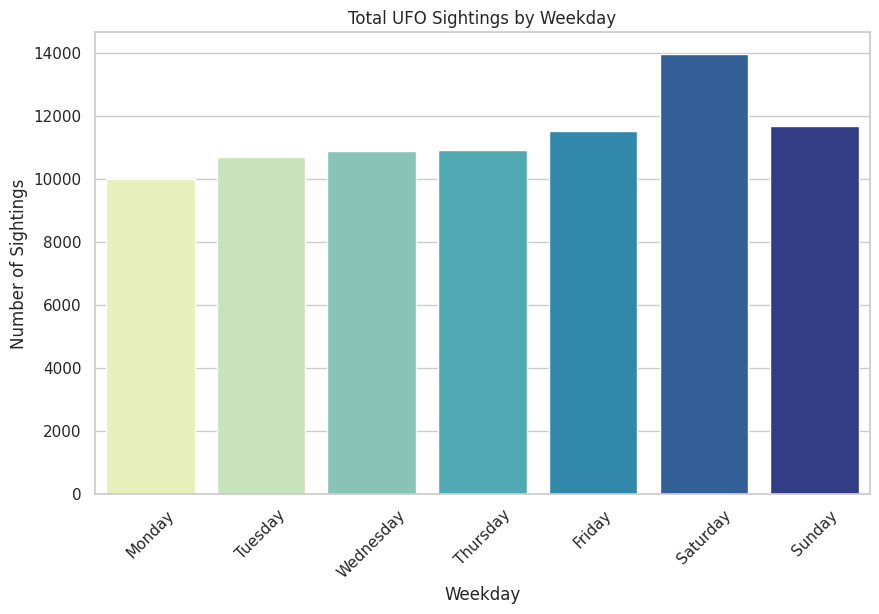

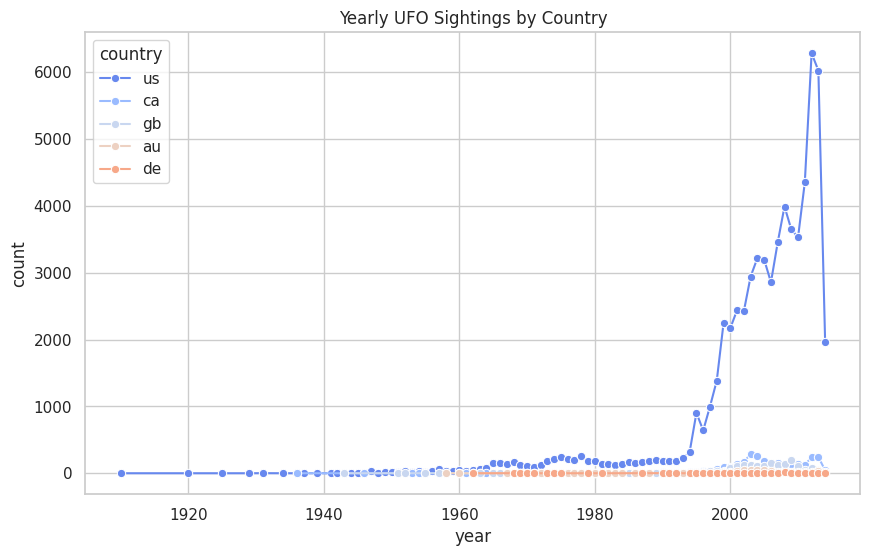

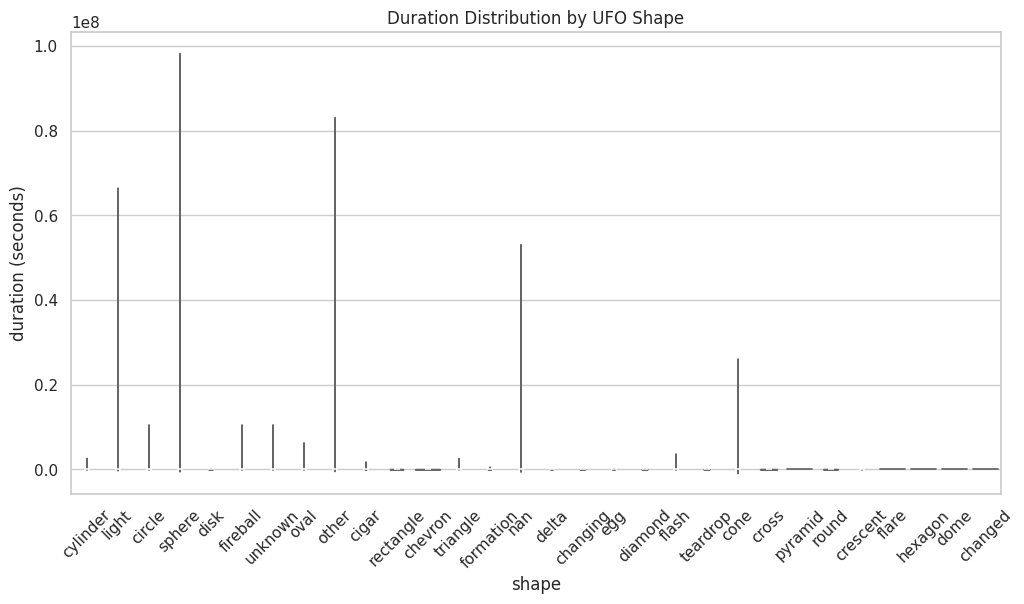

In [79]:

# 1. Îç∞Ïù¥ÌÑ∞ Î∂àÎü¨Ïò§Í∏∞

df = pd.read_csv("/home/yj/dev_ws/project_UFO/data/scrubbed.csv")  # Îç∞Ïù¥ÌÑ∞ ÌååÏùº Í≤ΩÎ°ú
df['datetime'] = pd.to_datetime(df['datetime'], errors='coerce')
df['date_posted'] = pd.to_datetime(df['date posted'], errors='coerce')

# ÌïÑÏöîÌïú Ïª¨Îüº Ï†ïÎ¶¨
df = df[['datetime','city','state','country','shape','duration (seconds)',
         'comments','latitude','longitude ']].copy()
df.rename(columns={'longitude ':'longitude'}, inplace=True)

# ÏãúÍ∞Ñ Í¥ÄÎ†® feature Ï∂îÍ∞Ä

df['year'] = df['datetime'].dt.year
df['month'] = df['datetime'].dt.month
df['weekday'] = df['datetime'].dt.day_name()

# weekday √ó shape ÌûàÌä∏Îßµ

# ÏöîÏùºÎ≥Ñ UFO Î™©Í≤© Ïàò Ìï©Í≥Ñ
df_weekday = df.groupby('weekday').size().reset_index(name='count')

# ÏöîÏùº ÏàúÏÑú ÏßÄÏ†ï (Mon~Sun)
weekday_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]

plt.figure(figsize=(10,6))
sns.barplot(data=df_weekday, x='weekday', y='count', order=weekday_order, palette="YlGnBu")
plt.title("Total UFO Sightings by Weekday")
plt.xlabel("Weekday")
plt.ylabel("Number of Sightings")
plt.xticks(rotation=45)
plt.show()


# ÏãúÍ≥ÑÏó¥: Ïó∞ÎèÑÎ≥Ñ UFO sightings lineplot

df_year = df.groupby(['year','country']).size().reset_index(name='count')
plt.figure(figsize=(10,6))
sns.lineplot(data=df_year, x='year', y='count', hue='country', marker='o')
plt.title("Yearly UFO Sightings by Country")
plt.show()

# Ïà´ÏûêÎ°ú Î≥ÄÌôò, Î≥ÄÌôò Ïã§Ìå® Ïãú NaN
df['latitude'] = pd.to_numeric(df['latitude'], errors='coerce')
df['longitude'] = pd.to_numeric(df['longitude'], errors='coerce')

# NaN Ï†úÍ±∞
df_map = df.dropna(subset=['latitude','longitude']).copy()

# Folium ÏßÄÎèÑ: Î™©Í≤© ÏúÑÏπò ÌëúÏãú

# ÏúÑÎèÑ, Í≤ΩÎèÑ ÏóÜÎäî Ìñâ Ï†úÍ±∞
df_map = df.dropna(subset=['latitude','longitude']).copy()
m = folium.Map(location=[39.8283, -98.5795], zoom_start=4)  # ÎØ∏Íµ≠ Ï§ëÏã¨
for _, row in df_map.iterrows():
    folium.CircleMarker(
        location=[row['latitude'], row['longitude']],
        radius=3,
        color='red',
        fill=True,
        fill_opacity=0.6,
        popup=f"{row['city']}, {row['state']} - {row['shape']}"
    ).add_to(m)
m.save("ufo_map.html")
m 

# shapeÎ•º Î¨∏ÏûêÏó¥Î°ú Î≥ÄÌôò
df['shape'] = df['shape'].astype(str)

# durationÏùÑ Ïà´ÏûêÎ°ú Î≥ÄÌôò, Î≥ÄÌôò Ïã§Ìå® Ïãú NaN
df['duration (seconds)'] = pd.to_numeric(df['duration (seconds)'], errors='coerce')

# Í≤∞Ï∏°Ïπò Ï†úÍ±∞
df_violin = df.dropna(subset=['shape', 'duration (seconds)'])

# violin plot
plt.figure(figsize=(12,6))
sns.violinplot(data=df_violin, x='shape', y='duration (seconds)')
plt.xticks(rotation=45)
plt.title("Duration Distribution by UFO Shape")
plt.show()

m = folium.Map(location=[39.8283, -98.5795], zoom_start=4)  # ÎØ∏Íµ≠ Ï§ëÏã¨
for _, row in df_map.iterrows():
    folium.CircleMarker(
        location=[row['latitude'], row['longitude']],
        radius=3,
        color='red',
        fill=True,
        fill_opacity=0.6,
        popup=f"{row['city']}, {row['state']} - {row['shape']}"
    ).add_to(m)

m.save("ufo_map.html")

/tmp/ipykernel_4850/543878579.py:13: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




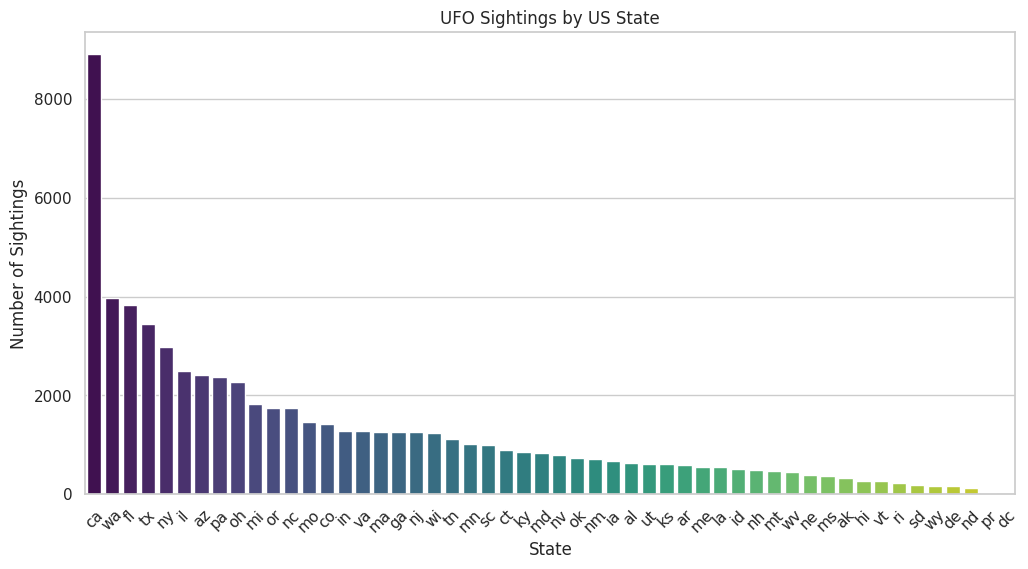

In [81]:
# 1ÎØ∏Íµ≠ Îç∞Ïù¥ÌÑ∞Îßå ÌïÑÌÑ∞ÎßÅ

df_us = df[df['country']=='us'].copy()

#  Ï£ºÎ≥Ñ sighting ÌöüÏàò Í≥ÑÏÇ∞

state_counts = df_us['state'].value_counts().reset_index()
state_counts.columns = ['state','count']

#  ÏãúÍ∞ÅÌôî (Barplot)

plt.figure(figsize=(12,6))
sns.barplot(data=state_counts, x='state', y='count', palette="viridis")
plt.xticks(rotation=45)
plt.title("UFO Sightings by US State")
plt.ylabel("Number of Sightings")
plt.xlabel("State")
plt.show()

### Ï£º Î≥Ñ Î™©Í≤© ÏÇ¨Î°Ä Îû≠ÌÇπ

In [87]:
# ÎØ∏Íµ≠ Îç∞Ïù¥ÌÑ∞Îßå ÌïÑÌÑ∞ÎßÅ
df_us = df[df['country']=='us'].copy()
df_us['state'] = df_us['state'].str.upper()  # ÎåÄÎ¨∏Ïûê Î≥ÄÌôò

# Ï£ºÎ≥Ñ top1 shape Í≥ÑÏÇ∞
df_top_shape = df_us.groupby(['state','shape']).size().reset_index(name='count')
df_top_shape = df_top_shape.sort_values(['state','count'], ascending=[True, False])
df_top1 = df_top_shape.groupby('state').first().reset_index()  # Í∞Å Ï£ºÎ≥Ñ top1

# Plotly Choropleth
# ÏÉâÏÉÅÏùÄ Î™©Í≤©Ïàò(count)Î•º ÏÇ¨Ïö©ÌïòÍ≥†, hover textÏóê top shape ÌëúÏãú
df_top1['hover_text'] = df_top1.apply(lambda x: f"State: {x['state']}<br>Top Shape: {x['shape']}<br>Sightings: {x['count']}", axis=1)

fig = px.choropleth(
    df_top1,
    locations='state',
    locationmode='USA-states',
    color='count',
    hover_name='state',
    hover_data={'count':False, 'state':False, 'hover_text':True},
    color_continuous_scale="Reds",
    scope="usa"
)

# hover text Ï†ÅÏö©
fig.update_traces(hovertemplate=df_top1['hover_text'])

fig.update_layout(title_text='US UFO Sightings by State (Top1 Shape)')
fig.show()

### Ï£º Î≥ÑÎ°ú Î™©Í≤©ÏÇ¨Î°Ä ÏßÄÎèÑÏóê ÏãúÍ∞ÅÌôî

In [ ]:
import plotly.graph_objects as go

# 1ÎØ∏Íµ≠ Îç∞Ïù¥ÌÑ∞Îßå ÌïÑÌÑ∞ÎßÅ
df_us = df[df['country']=='us'].copy()
df_us['state'] = df_us['state'].str.upper()  # ÎåÄÎ¨∏Ïûê Î≥ÄÌôò

# 2Ï£ºÎ≥Ñ top1 shape Í≥ÑÏÇ∞
df_top_shape = df_us.groupby(['state','shape']).size().reset_index(name='count')
df_top_shape = df_top_shape.sort_values(['state','count'], ascending=[True, False])
df_top1 = df_top_shape.groupby('state').first().reset_index()

# 3ÎØ∏Íµ≠ Ï£º Ï§ëÏã¨ Ï¢åÌëú
us_states_centers = {
    'AL':[32.806671, -86.791130],'AK':[61.370716, -152.404419],'AZ':[33.729759, -111.431221],
    'AR':[34.969704, -92.373123],'CA':[36.116203, -119.681564],'CO':[39.059811, -105.311104],
    'CT':[41.597782, -72.755371],'DE':[39.318523, -75.507141],'FL':[27.766279, -81.686783],
    'GA':[33.040619, -83.643074],'HI':[21.094318, -157.498337],'ID':[44.240459, -114.478828],
    'IL':[40.349457, -88.986137],'IN':[39.849426, -86.258278],'IA':[42.011539, -93.210526],
    'KS':[38.526600, -96.726486],'KY':[37.668140, -84.670067],'LA':[31.169546, -91.867805],
    'ME':[44.693947, -69.381927],'MD':[39.063946, -76.802101],'MA':[42.230171, -71.530106],
    'MI':[43.326618, -84.536095],'MN':[45.694454, -93.900192],'MS':[32.741646, -89.678696],
    'MO':[38.456085, -92.288368],'MT':[46.921925, -110.454353],'NE':[41.125370, -98.268082],
    'NV':[38.313515, -117.055374],'NH':[43.452492, -71.563896],'NJ':[40.298904, -74.521011],
    'NM':[34.840515, -106.248482],'NY':[42.165726, -74.948051],'NC':[35.630066, -79.806419],
    'ND':[47.528912, -99.784012],'OH':[40.388783, -82.764915],'OK':[35.565342, -96.928917],
    'OR':[44.572021, -122.070938],'PA':[40.590752, -77.209755],'RI':[41.680893, -71.511780],
    'SC':[33.856892, -80.945007],'SD':[44.299782, -99.438828],'TN':[35.747845, -86.692345],
    'TX':[31.054487, -97.563461],'UT':[40.150032, -111.862434],'VT':[44.045876, -72.710686],
    'VA':[37.769337, -78.169968],'WA':[47.400902, -121.490494],'WV':[38.491226, -80.954456],
    'WI':[44.268543, -89.616508],'WY':[42.755966, -107.302490]
}

df_top1['lat'] = df_top1['state'].map(lambda x: us_states_centers.get(x,[None,None])[0])
df_top1['lon'] = df_top1['state'].map(lambda x: us_states_centers.get(x,[None,None])[1])
df_top1 = df_top1.dropna(subset=['lat','lon'])

# 4Scatter GeoÎ°ú ÌÖçÏä§Ìä∏Îßå ÌëúÏãú
fig = go.Figure()

fig.add_trace(go.Scattergeo(
    locationmode='USA-states',
    lon=df_top1['lon'],
    lat=df_top1['lat'],
    text=df_top1['shape'],  # ÏßÄÎèÑÏóê Í∏ÄÏûê ÌëúÏãú
    mode='text',
    textfont=dict(size=12, color='red')
))

fig.update_layout(
    title_text="US UFO Sightings: Top1 Shape per State",
    geo=dict(
        scope='usa',
        showland=True,
        landcolor="lightgray"
    )
)

fig.show()

### TOP1 shapeÍ∞Ä Îã§ lightÎùº top1Îßå Ï†úÏô∏

In [ ]:
# Ï£ºÎ≥Ñ shapeÎ≥Ñ count Í≥ÑÏÇ∞
df_shape_count = df_us.groupby(['state','shape']).size().reset_index(name='count')
df_shape_count = df_shape_count.sort_values(['state','count'], ascending=[True, False])

# top1Ïù¥ 'light'Î©¥ Ï†úÏô∏ÌïòÍ≥† top2 ÏÑ†ÌÉù
df_top = pd.DataFrame()
for state, group in df_shape_count.groupby('state'):
    if group.iloc[0]['shape'] == 'light':
        if len(group) > 1:
            df_top = pd.concat([df_top, group.iloc[[1]]])
    else:
        df_top = pd.concat([df_top, group.iloc[[0]]])

df_top = df_top.reset_index(drop=True)

# ÎØ∏Íµ≠ Ï£º Ï§ëÏã¨ Ï¢åÌëú
us_states_centers = {
    'AL':[32.806671, -86.791130],'AK':[61.370716, -152.404419],'AZ':[33.729759, -111.431221],
    'AR':[34.969704, -92.373123],'CA':[36.116203, -119.681564],'CO':[39.059811, -105.311104],
    'CT':[41.597782, -72.755371],'DE':[39.318523, -75.507141],'FL':[27.766279, -81.686783],
    'GA':[33.040619, -83.643074],'HI':[21.094318, -157.498337],'ID':[44.240459, -114.478828],
    'IL':[40.349457, -88.986137],'IN':[39.849426, -86.258278],'IA':[42.011539, -93.210526],
    'KS':[38.526600, -96.726486],'KY':[37.668140, -84.670067],'LA':[31.169546, -91.867805],
    'ME':[44.693947, -69.381927],'MD':[39.063946, -76.802101],'MA':[42.230171, -71.530106],
    'MI':[43.326618, -84.536095],'MN':[45.694454, -93.900192],'MS':[32.741646, -89.678696],
    'MO':[38.456085, -92.288368],'MT':[46.921925, -110.454353],'NE':[41.125370, -98.268082],
    'NV':[38.313515, -117.055374],'NH':[43.452492, -71.563896],'NJ':[40.298904, -74.521011],
    'NM':[34.840515, -106.248482],'NY':[42.165726, -74.948051],'NC':[35.630066, -79.806419],
    'ND':[47.528912, -99.784012],'OH':[40.388783, -82.764915],'OK':[35.565342, -96.928917],
    'OR':[44.572021, -122.070938],'PA':[40.590752, -77.209755],'RI':[41.680893, -71.511780],
    'SC':[33.856892, -80.945007],'SD':[44.299782, -99.438828],'TN':[35.747845, -86.692345],
    'TX':[31.054487, -97.563461],'UT':[40.150032, -111.862434],'VT':[44.045876, -72.710686],
    'VA':[37.769337, -78.169968],'WA':[47.400902, -121.490494],'WV':[38.491226, -80.954456],
    'WI':[44.268543, -89.616508],'WY':[42.755966, -107.302490]
}

df_top['lat'] = df_top['state'].map(lambda x: us_states_centers.get(x,[None,None])[0])
df_top['lon'] = df_top['state'].map(lambda x: us_states_centers.get(x,[None,None])[1])
df_top = df_top.dropna(subset=['lat','lon'])

# ÏßÄÎèÑÏóê ÌÖçÏä§Ìä∏ ÌëúÏãú
fig = go.Figure()

fig.add_trace(go.Scattergeo(
    locationmode='USA-states',
    lon=df_top['lon'],
    lat=df_top['lat'],
    text=df_top['shape'],
    mode='text',
    textfont=dict(size=12, color='blue')
))

fig.update_layout(
    title_text="US UFO Sightings by State (Top2 if Top1 is 'light')",
    geo=dict(
        scope='usa',
        showland=True,
        landcolor="lightgray"
    )
)

fig.show()


In [88]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go

# ------------------------
# Îç∞Ïù¥ÌÑ∞ Î∂àÎü¨Ïò§Í∏∞
# ------------------------
file_path = '/home/yj/dev_ws/project_UFO/data/scrubbed.csv'
df = pd.read_csv(file_path, low_memory=False)

# country Ïª¨Îüº Ï†ÑÏ≤òÎ¶¨
df['country'] = df['country'].str.upper()

# ------------------------
# 1Ô∏è‚É£ Íµ≠Í∞ÄÎ≥Ñ UFO sightings (ÏÑ∏Í≥Ñ ÏßÄÎèÑ)
# ------------------------
country_counts = df['country'].value_counts().reset_index()
country_counts.columns = ['country_iso2', 'count']

iso2_to_iso3 = {
    'US': 'USA', 'CA': 'CAN', 'GB': 'GBR', 'AU': 'AUS', 'DE': 'DEU'
}
country_counts['country_iso3'] = country_counts['country_iso2'].map(iso2_to_iso3)
country_counts_mapped = country_counts.dropna(subset=['country_iso3'])

fig_world = px.choropleth(
    country_counts_mapped,
    locations='country_iso3',
    color='count',
    hover_name='country_iso2',
    color_continuous_scale=px.colors.sequential.Plasma,
    title='UFO numbers by Country',
    locationmode='ISO-3'
)

# HTMLÎ°ú Ï†ÄÏû• (Standalone)
fig_world.write_html("ufo_world_map.html", include_plotlyjs='cdn', full_html=True)

# ------------------------
# 2Ô∏è‚É£ ÎØ∏Íµ≠ Ï£ºÎ≥Ñ top shape ÌëúÏãú (Top2 if Top1 is 'light')
# ------------------------
df_us = df[df['country']=='US'].copy()
df_us['state'] = df_us['state'].str.upper()

# shapeÎ≥Ñ count
df_shape_count = df_us.groupby(['state','shape']).size().reset_index(name='count')
df_shape_count = df_shape_count.sort_values(['state','count'], ascending=[True, False])

# top1Ïù¥ 'light'Î©¥ top2
df_top = pd.DataFrame()
for state, group in df_shape_count.groupby('state'):
    if group.iloc[0]['shape'].lower() == 'light':
        if len(group) > 1:
            df_top = pd.concat([df_top, group.iloc[[1]]])
    else:
        df_top = pd.concat([df_top, group.iloc[[0]]])
df_top = df_top.reset_index(drop=True)

# ÎØ∏Íµ≠ Ï£º Ï§ëÏã¨ Ï¢åÌëú
us_states_centers = {
    'AL':[32.806671, -86.791130],'AK':[61.370716, -152.404419],'AZ':[33.729759, -111.431221],
    'AR':[34.969704, -92.373123],'CA':[36.116203, -119.681564],'CO':[39.059811, -105.311104],
    'CT':[41.597782, -72.755371],'DE':[39.318523, -75.507141],'FL':[27.766279, -81.686783],
    'GA':[33.040619, -83.643074],'HI':[21.094318, -157.498337],'ID':[44.240459, -114.478828],
    'IL':[40.349457, -88.986137],'IN':[39.849426, -86.258278],'IA':[42.011539, -93.210526],
    'KS':[38.526600, -96.726486],'KY':[37.668140, -84.670067],'LA':[31.169546, -91.867805],
    'ME':[44.693947, -69.381927],'MD':[39.063946, -76.802101],'MA':[42.230171, -71.530106],
    'MI':[43.326618, -84.536095],'MN':[45.694454, -93.900192],'MS':[32.741646, -89.678696],
    'MO':[38.456085, -92.288368],'MT':[46.921925, -110.454353],'NE':[41.125370, -98.268082],
    'NV':[38.313515, -117.055374],'NH':[43.452492, -71.563896],'NJ':[40.298904, -74.521011],
    'NM':[34.840515, -106.248482],'NY':[42.165726, -74.948051],'NC':[35.630066, -79.806419],
    'ND':[47.528912, -99.784012],'OH':[40.388783, -82.764915],'OK':[35.565342, -96.928917],
    'OR':[44.572021, -122.070938],'PA':[40.590752, -77.209755],'RI':[41.680893, -71.511780],
    'SC':[33.856892, -80.945007],'SD':[44.299782, -99.438828],'TN':[35.747845, -86.692345],
    'TX':[31.054487, -97.563461],'UT':[40.150032, -111.862434],'VT':[44.045876, -72.710686],
    'VA':[37.769337, -78.169968],'WA':[47.400902, -121.490494],'WV':[38.491226, -80.954456],
    'WI':[44.268543, -89.616508],'WY':[42.755966, -107.302490]
}

df_top['lat'] = df_top['state'].map(lambda x: us_states_centers.get(x,[None,None])[0])
df_top['lon'] = df_top['state'].map(lambda x: us_states_centers.get(x,[None,None])[1])
df_top = df_top.dropna(subset=['lat','lon'])

# Scattergeo ÌÖçÏä§Ìä∏ ÏßÄÎèÑ
fig_us = go.Figure()
fig_us.add_trace(go.Scattergeo(
    locationmode='USA-states',
    lon=df_top['lon'],
    lat=df_top['lat'],
    text=df_top['shape'],
    mode='text',
    textfont=dict(size=12, color='blue')
))

fig_us.update_layout(
    title_text="US UFO Sightings by State (Top2 if Top1 is 'light')",
    geo=dict(scope='usa', showland=True, landcolor="lightgray")
)

# HTMLÎ°ú Ï†ÄÏû• (Standalone)
fig_us.write_html("ufo_us_top_shape_map.html", include_plotlyjs='cdn', full_html=True)

print("‚úÖ HTML export ÏôÑÎ£å. ÌååÏùºÏùÑ Î∏åÎùºÏö∞Ï†ÄÏóêÏÑú Ïó¥Î©¥ Ïù∏ÌÑ∞ÎûôÌã∞Î∏å Í∑∏ÎûòÌîÑ ÌôïÏù∏ Í∞ÄÎä•")


‚úÖ HTML export ÏôÑÎ£å. ÌååÏùºÏùÑ Î∏åÎùºÏö∞Ï†ÄÏóêÏÑú Ïó¥Î©¥ Ïù∏ÌÑ∞ÎûôÌã∞Î∏å Í∑∏ÎûòÌîÑ ÌôïÏù∏ Í∞ÄÎä•
